In [12]:
import pandas as pd
import numpy as np

In [11]:
df=pd.read_csv('/content/Sports.csv')

In [13]:
print(df.columns)

Index(['Text', 'Label'], dtype='object')


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [16]:
tokens = Tokenizer(oov_token='oov')
tokens.fit_on_texts(df['Text'])

In [18]:
vocab = tokens.word_index
print(vocab)

{'oov': 1, 'sports': 2, 'the': 3, 'and': 4, 'of': 5, 'to': 6, 'in': 7, 'can': 8, 'a': 9, 'have': 10, 'has': 11, 'events': 12, 'for': 13, 'athletes': 14, 'on': 15, 'scandals': 16, 'health': 17, 'issues': 18, 'commercialization': 19, 'participation': 20, "team's": 21, 'recent': 22, 'play': 23, 'over': 24, 'team': 25, 'led': 26, 'physical': 27, 'foster': 28, 'sense': 29, 'community': 30, 'among': 31, 'skills': 32, 'organizations': 33, 'pressure': 34, 'lead': 35, 'behavior': 36, 'culture': 37, 'perpetuates': 38, 'should': 39, 'more': 40, 'from': 41, 'programs': 42, 'integrity': 43, 'social': 44, 'their': 45, 'high': 46, 'about': 47, 'doping': 48, 'role': 49, 'teamwork': 50, 'is': 51, 'competitions': 52, 'fair': 53, 'values': 54, 'provide': 55, 'controversies': 56, 'often': 57, 'tarnish': 58, 'well': 59, 'being': 60, 'win': 61, 'all': 62, 'unethical': 63, 'harmful': 64, 'stereotypes': 65, 'unrealistic': 66, 'injuries': 67, 'do': 68, 'address': 69, 'diversity': 70, 'by': 71, 'discipline': 72

In [20]:
sequence = tokens.texts_to_sequences(df ["Text"])
print(sequence)

[[3, 21, 22, 93, 10, 94, 95, 5, 96, 23], [97, 45, 22, 98, 3, 21, 99, 100, 46], [101, 5, 102, 103, 10, 104, 9, 105, 24, 3, 21, 22, 106], [3, 107, 108, 5, 3, 109, 11, 110, 3, 25, 7, 111], [112, 47, 48, 113, 10, 26, 6, 114, 115, 3, 25], [3, 49, 5, 2, 7, 116, 27, 117, 4, 50, 51, 118], [2, 52, 28, 9, 29, 5, 30, 4, 119, 31, 120], [25, 2, 121, 122, 4, 123, 32], [124, 4, 53, 23, 125, 126, 54, 7, 127], [2, 12, 55, 128, 4, 129, 13, 130], [56, 4, 16, 57, 58, 3, 131, 5, 132, 2], [2, 33, 133, 134, 24, 3, 59, 60, 5, 14], [3, 34, 6, 61, 135, 62, 136, 8, 35, 6, 63, 36, 7, 2], [2, 37, 38, 64, 65, 4, 66, 137, 138], [2, 67, 8, 10, 139, 140, 141, 15, 142, 17, 4, 59, 60], [3, 143, 5, 2, 15, 144, 51, 145, 4, 146], [2, 147, 39, 68, 40, 6, 69, 18, 5, 148, 4, 70], [3, 19, 5, 2, 149, 3, 150, 5, 53, 151], [2, 152, 71, 153, 4, 14, 154, 155, 36], [2, 12, 8, 156, 157, 41, 158, 159, 160, 9, 161, 162], [20, 7, 2, 8, 163, 164, 165, 32, 166, 167, 72, 4, 168], [3, 73, 15, 74, 7, 2, 75, 41, 3, 169, 5, 20], [2, 170, 4, 42

In [21]:
seq_pad=pad_sequences(sequence, maxlen=6, padding='post', truncating='post')
print(seq_pad)

[[  3  21  22  93  10  94]
 [ 97  45  22  98   3  21]
 [101   5 102 103  10 104]
 [  3 107 108   5   3 109]
 [112  47  48 113  10  26]
 [  3  49   5   2   7 116]
 [  2  52  28   9  29   5]
 [ 25   2 121 122   4 123]
 [124   4  53  23 125 126]
 [  2  12  55 128   4 129]
 [ 56   4  16  57  58   3]
 [  2  33 133 134  24   3]
 [  3  34   6  61 135  62]
 [  2  37  38  64  65   4]
 [  2  67   8  10 139 140]
 [  3 143   5   2  15 144]
 [  2 147  39  68  40   6]
 [  3  19   5   2 149   3]
 [  2 152  71 153   4  14]
 [  2  12   8 156 157  41]
 [ 20   7   2   8 163 164]
 [  3  73  15  74   7   2]
 [  2 170   4  42  39 171]
 [  2  76  57 174  46 175]
 [  3 178  77   2 179  75]
 [  2  79   8  80   9  29]
 [ 83   4 182  16  58   3]
 [  3  37   5   2 183 184]
 [  2 188  38  66 189   5]
 [  2 191  11   3 192   6]
 [ 19  11 196   2 197   9]
 [  2  67 202   3 203  13]
 [  2  55   9  85  13  44]
 [  3  73  15  74   8  80]
 [  2 215  86 216  13 217]
 [ 16   4  56  87   3 220]
 [  2  12  10   3 222   6]
 

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Label"]=le.fit_transform(df["Label"])

X=seq_pad
y=df["Label"]

In [23]:
df.head()

,Text,Label
0,The team's recent victories have raised suspic...,1
1,"Despite their recent loss, the team's morale r...",1
2,Rumors of match-fixing have cast a shadow over...,0
3,The unexpected resignation of the coach has le...,0
4,Speculations about doping allegations have led...,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

model=Sequential()
model.add(SimpleRNN(128, input_shape=(X_train.shape[1],1),activation='relu',dropout=0.2))
model.add(Dense(81, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train= X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test= X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
history=model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8371 - loss: 0.3030 - val_accuracy: 0.5833 - val_loss: 1.3047
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6629 - loss: 0.4602 - val_accuracy: 0.5833 - val_loss: 1.2594
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7292 - loss: 0.3890 - val_accuracy: 0.5833 - val_loss: 1.2292
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8930 - loss: 0.3337 - val_accuracy: 0.5833 - val_loss: 1.2125
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9186 - loss: 0.2844 - val_accuracy: 0.5833 - val_loss: 1.2228
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7652 - loss: 0.4224 - val_accuracy: 0.5833 - val_loss: 1.2652
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8674 - loss: 0.2954 - val_accuracy: 0.5833 - val_loss: 1.3071
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7907 - loss: 0.3331 - val_accuracy: 0.5833 - val_loss: 1.3402


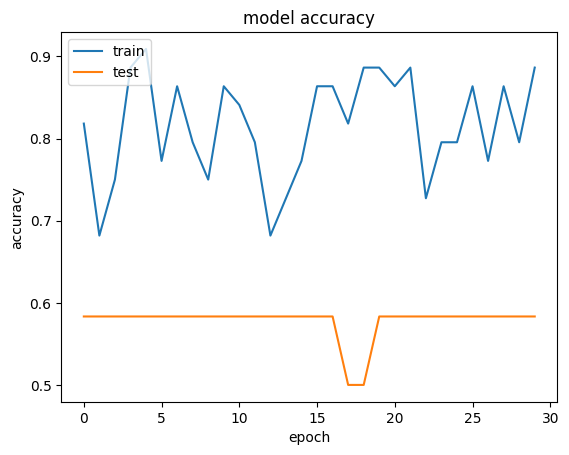

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
new_text = [
    "Team sports encourage collaboration and communication skills.",
    "The pressure to win in sports can overshadow the enjoyment of playing the game.",
]

In [34]:
new_seq=tokens.texts_to_sequences(new_text)
new_pad=pad_sequences(new_seq, maxlen=6, padding='post', truncating='post')
pred=model.predict(new_pad)
for i,p in enumerate(pred):
  print(f"Text: {new_text[i]}")
  print(f"Prediction: {p[0]:4f} ({'Positive' if p[0]>0.5 else 'Negative'})\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
Text: Team sports encourage collaboration and communication skills.
Prediction: 0.891553 (Positive)

Text: The pressure to win in sports can overshadow the enjoyment of playing the game.
Prediction: 0.098892 (Negative)

